## Import Dependencies and Open Instrument Handles

In [44]:
import sys
import os
import time
import pyvisa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from binascii import unhexlify
import serial

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\Drivers")

from Driver_TECSource_5240 import *
from Driver_PM_PM5020 import *
from Driver_LaserSource_71440108 import *

In [45]:
rm = pyvisa.ResourceManager()

tec = TECSource_5240()
tec.open(rm)

pm = PM_PM5020()
pm.open(rm)

ld = LaserSource_71440108()
ld.open(rm)

## Initialization

In [46]:
ld.set_laser_current(1,50)
ld.set_laser_current(2,50)
ld.set_laser_current(3,50)
ld.set_laser_current(4,50)
ld.set_output_on(2)
#ld.set_output_on(3)
#ld.set_output_on(4)

In [9]:
T_Start = 23
T_Stop = 50
T_Step = 0.2
t_wait = 5
n = int((T_Stop-T_Start)/T_Step+1)
pm.set_units(1,"W")

## Measurement Routine (Steady State)

In [36]:
meas_df = pd.DataFrame()
t0 = time.time()
for k in range(0,480,1):
    time.sleep(0.25)
    T_read = tec.get_temperature()
    Power_read = pm.get_power(1)
    t_meas = time.time()-t0
    dict = {'Time_s':t_meas,'Temperature_C':T_read ,"Power_W":Power_read}
    meas_df_temp = pd.DataFrame([dict])
    data = [meas_df_temp, meas_df]
    meas_df = pd.concat(data,ignore_index=True,sort=False)

## View Plot and Save Data

In [37]:
meas_df.to_csv(r"Power_TX_Temp_23_Lane_234_DC_20.csv")

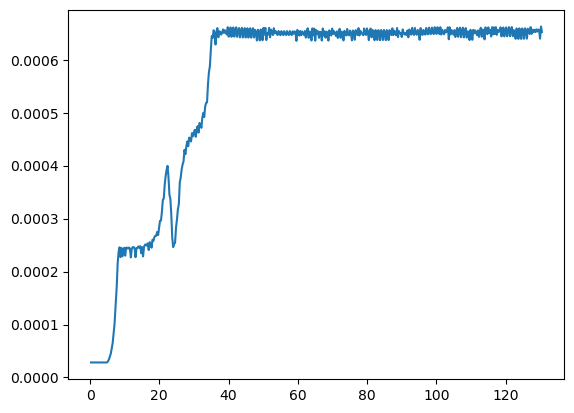

In [38]:
plt.plot(meas_df.Time_s,meas_df.Power_W)

## Measurement Routine (Temperature Ramp)

In [39]:
t1 = time.time()
for k in range(0,n+1,1):
    if(T_Start+k*T_Step>47):
        T_Set = 47
    else:
        T_Set = T_Start+k*T_Step
    tec.set_temperature(T_Set)
    time.sleep(t_wait)
    T_read = tec.get_temperature()
    Power_read = pm.get_power(1)
    t_meas = time.time()-t0
    dict = {'Time_s':t_meas, 'T_Wait_s':t_wait ,'Temperature_C':T_read ,"Power_W":Power_read}
    meas_df_temp = pd.DataFrame([dict])
    data = [meas_df_temp, meas_df]
    meas_df = pd.concat(data,ignore_index=True,sort=False)

tec.set_temperature(23)

## View, Plot and Save Data

In [40]:
meas_df

,Time_s,T_Wait_s,Temperature_C,Power_W
0,818.115180,5.0,45.00,0.000622
1,813.096407,5.0,45.00,0.000629
2,808.078089,5.0,44.99,0.000619
3,803.050215,5.0,44.99,0.000636
4,798.034566,5.0,44.99,0.000637
...,...,...,...,...
612,1.359206,NaN,22.99,0.000028
613,1.088171,NaN,22.99,0.000028
614,0.816393,NaN,22.99,0.000028
615,0.544270,NaN,22.99,0.000028


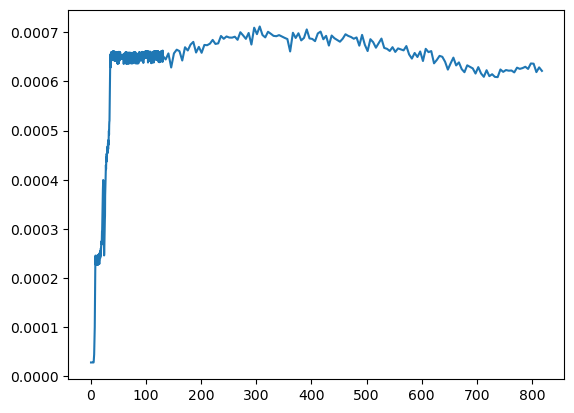

In [41]:
plt.plot(meas_df.Time_s,meas_df.Power_W)

In [42]:
meas_df.to_csv(r"Power_TX_Temp_Sweep_Lane_234_DC_20.csv")

## Close Instrument Handles

In [48]:
tec.close()
pm.close()
ld.close()

## Debug Routines

In [10]:
pm.get_power(1)

0.000691874

In [50]:
ld.set_output_off(2)
ld.set_output_off(3)
ld.set_output_off(4)